In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('data/DRUG1n.csv')
data.head(5)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [45]:
data_encode = data.copy()

# 数值的映射
p_class_map_sex = {label: idx for idx, label in enumerate(set(data['Sex']))}
p_class_map_bp = {label: idx for idx, label in enumerate(set(data['BP']))}
p_class_map_cholesterol = {label: idx for idx, label in enumerate(set(data['Cholesterol']))}
data_encode['Sex'] = data['Sex'].map(p_class_map_sex)
data_encode['BP'] = data['BP'].map(p_class_map_bp)
data_encode['Cholesterol'] = data['Cholesterol'].map(p_class_map_cholesterol)

# OneHot编码
data_encode = data_encode.drop(['Drug'], axis=1)
df = pd.get_dummies(data['Drug'], columns=np.unique(data['Drug'].values)).reset_index(drop=True)
data_encode = pd.concat([data_encode, df], axis=1)
data_encode.head(5)

,Age,Sex,BP,Cholesterol,Na,K,drugA,drugB,drugC,drugX,drugY
0,23,1,2,1,0.792535,0.031258,0,0,0,0,1
1,47,0,1,1,0.739309,0.056468,0,0,1,0,0
2,47,0,1,1,0.697269,0.068944,0,0,1,0,0
3,28,1,0,1,0.563682,0.072289,0,0,0,1,0
4,61,1,1,1,0.559294,0.030998,0,0,0,0,1


In [46]:
# 计算两个向量的欧氏距离
def distance_euclidean(vector_a, vector_b):
    return np.sqrt(np.sum(np.power(vector_a - vector_b, 2)))


# 构建k个初始簇质心
def rand_centroids(data_set, k):
    m = np.shape(data_set)[0]  # 总样本数
    centroids_idx = set()  # 随机样本索引
    while len(centroids_idx) < k:
        rand_j = np.random.randint(m)
        centroids_idx.add(rand_j)
    centroids = data_set[list(centroids_idx)]  # 初始簇质心
    return centroids


# K-均值聚类方法
def k_means(data_set, k):
    m = np.shape(data_set)[0]  # 样本总数
    cluster_result = np.mat(np.zeros((m, 2)))  # 簇分配结果矩阵
    centroids = rand_centroids(data_set, k)  # 构建k个初始随机质心

    cluster_changed = True  # 簇变化标志
    while cluster_changed:
        cluster_changed = False
        for i in range(m):
            min_dist = np.inf  # 样本点离最近质心的距离
            min_idx = -1  # 样本的簇标记
            for j in range(k):
                dist_ij = distance_euclidean(centroids[j, :], data_set[i, :])  # 样本点I到质心J的距离
                if dist_ij < min_dist:
                    min_dist = dist_ij
                    min_idx = j
            if cluster_result[i, 0] != min_idx:
                cluster_changed = True  # 样本点的簇标记发生变化
            cluster_result[i, :] = min_idx, min_dist ** 2  # 簇分配结果矩阵的两列分别为簇标记和误差
        for cent in range(k):  # 更新质心的位置
            centroids[cent, :] = np.mean(data_set[np.nonzero(cluster_result[:, 0].A == cent)[0]], axis=0)
    return centroids, cluster_result

In [61]:
my_centroids, my_cluster_result = k_means(data_encode.to_numpy(), 4)
# 簇分配结果MSE
print("MSELoss: ", np.sum(my_cluster_result, axis=0)[0, 1])
# 簇分配结果
my_cluster_result

MSELoss:  4318.008082213563


matrix([[ 3.        ,  2.77818562],
        [ 1.        , 45.00781463],
        [ 1.        , 45.00500551],
        [ 3.        , 17.68148876],
        [ 2.        , 42.30749513],
        [ 3.        ,  7.11379946],
        [ 2.        , 32.94484238],
        [ 1.        ,  2.03033595],
        [ 2.        , 31.41320861],
        [ 1.        ,  7.51951347],
        [ 1.        , 45.10605273],
        [ 1.        , 42.85918754],
        [ 1.        ,  7.58909331],
        [ 0.        , 33.76219318],
        [ 2.        , 23.01252181],
        [ 3.        , 67.51203169],
        [ 0.        ,  1.77225897],
        [ 1.        ,  8.98670332],
        [ 3.        ,  2.95878391],
        [ 3.        , 63.63286187],
        [ 2.        ,  7.02012113],
        [ 0.        , 29.71756092],
        [ 1.        , 44.16676789],
        [ 2.        , 44.10542879],
        [ 1.        , 56.03642297],
        [ 3.        , 16.61413743],
        [ 3.        , 48.94320386],
        [ 2.        , 33.308

In [62]:
# 簇质心
my_centroids

array([[6.82777778e+01, 3.61111111e-01, 1.05555556e+00, 5.00000000e-01,
        7.33597833e-01, 5.25318889e-02, 0.00000000e+00, 1.94444444e-01,
        5.55555556e-02, 2.50000000e-01, 5.00000000e-01],
       [4.04181818e+01, 4.72727273e-01, 1.10909091e+00, 4.54545455e-01,
        6.80580091e-01, 4.82204545e-02, 1.63636364e-01, 0.00000000e+00,
        9.09090909e-02, 2.72727273e-01, 4.72727273e-01],
       [5.45686275e+01, 4.90196078e-01, 1.00000000e+00, 5.88235294e-01,
        6.94590000e-01, 5.23292745e-02, 7.84313725e-02, 1.76470588e-01,
        5.88235294e-02, 2.94117647e-01, 3.92156863e-01],
       [2.41206897e+01, 5.51724138e-01, 1.17241379e+00, 5.17241379e-01,
        6.92302190e-01, 4.86675000e-02, 1.72413793e-01, 0.00000000e+00,
        1.03448276e-01, 2.58620690e-01, 4.65517241e-01]])

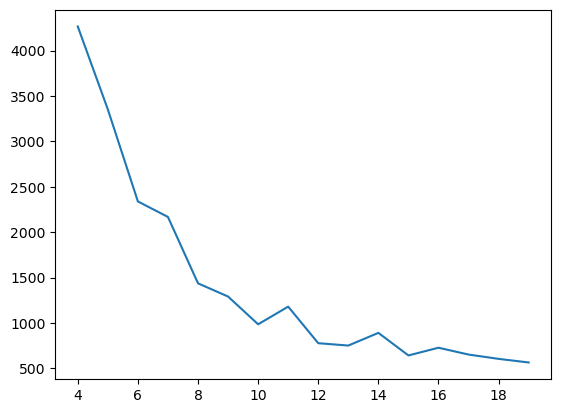

In [77]:
loss_list = []

for k in range(4, 20, 1):
    my_centroids, my_cluster_result = k_means(data_encode.to_numpy(), k)
    loss = np.sum(my_cluster_result, axis=0)[0, 1]
    loss_list.append(loss)

plt.plot(range(4, 20, 1), loss_list)

In [78]:
# 取第一个拐点 k = 10
my_centroids, my_cluster_result = k_means(data_encode.to_numpy(), 10)
# 簇分配结果MSE
print("MSELoss: ", np.sum(my_cluster_result, axis=0)[0, 1])
# 簇分配结果
my_cluster_result

MSELoss:  938.4452166051441


matrix([[ 8.        ,  2.11314519],
        [ 4.        ,  2.77785988],
        [ 4.        ,  2.77476461],
        [ 0.        , 10.21944252],
        [ 5.        ,  5.62881098],
        [ 8.        ,  4.65261417],
        [ 4.        ,  2.78646045],
        [ 9.        ,  4.78603068],
        [ 5.        ,  3.42013437],
        [ 9.        ,  0.67533377],
        [ 4.        ,  2.98816435],
        [ 0.        , 12.00251562],
        [ 9.        ,  0.77987603],
        [ 2.        ,  6.32023125],
        [ 4.        ,  5.37964094],
        [ 3.        ,  3.65656406],
        [ 2.        ,  8.70500961],
        [ 9.        ,  2.15275848],
        [ 8.        ,  1.67322836],
        [ 0.        ,  3.04479602],
        [ 5.        ,  4.37748753],
        [ 6.        , 10.63678767],
        [ 4.        ,  2.54199114],
        [ 4.        ,  1.39556808],
        [ 0.        ,  5.74878627],
        [ 0.        ,  9.14103233],
        [ 0.        ,  1.64426259],
        [ 4.        ,  2.691

In [79]:
# 簇质心
my_centroids

array([[3.07600000e+01, 6.40000000e-01, 1.20000000e+00, 6.00000000e-01,
        6.95020960e-01, 4.79456800e-02, 2.00000000e-01, 0.00000000e+00,
        8.00000000e-02, 2.40000000e-01, 4.80000000e-01],
       [5.25833333e+01, 3.33333333e-01, 9.16666667e-01, 5.83333333e-01,
        6.76273083e-01, 4.70912500e-02, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 3.33333333e-01, 4.16666667e-01],
       [7.16875000e+01, 3.75000000e-01, 1.18750000e+00, 6.87500000e-01,
        7.33669563e-01, 5.63841250e-02, 0.00000000e+00, 2.50000000e-01,
        6.25000000e-02, 2.50000000e-01, 4.37500000e-01],
       [1.76250000e+01, 6.25000000e-01, 1.37500000e+00, 3.12500000e-01,
        6.93080313e-01, 4.80089375e-02, 1.25000000e-01, 0.00000000e+00,
        6.25000000e-02, 3.12500000e-01, 5.00000000e-01],
       [4.82083333e+01, 4.16666667e-01, 9.16666667e-01, 4.58333333e-01,
        6.79691292e-01, 5.66935417e-02, 2.08333333e-01, 0.00000000e+00,
        2.08333333e-01, 2.91666667e-01, 2.91666667e-